In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./data_2000_2019.csv")

<h1>Removendo dados nulos</h1>

In [3]:
df = df.dropna(axis=0, how='any', subset=None, inplace=False)

<h1>Seleção de atributos</h1>

In [4]:
df = df[['micro_name_ibge', 'state_name', 'region_name', 'biome_name', 'ecozone_name', 'main_climate', 'month', 'year', 'dengue_cases', 'population', 'pop_density', 'tmax', 'tmin', 'pdsi', 'urban', 'water_network', 'water_shortage']]
df.columns = ['cidade', 'estado', 'regiao', 'bioma', 'ecozona', 'clima_principal', 'mes', 'ano', 'casos_dengue', 'populacao', 'densidade_populacional', 'temp_max', 'temp_min', 'pdsi', 'pop_urbana', 'rede_agua', 'escassez_agua']

<h1>Clusterização</h1>
<p>A clusterização deveria ter sido realizada na parte um do projeto. Porém, ela não foi aplicada nessa primeira fase. Dessa forma eu realizei agora.</p>

In [5]:
import math
from sklearn.cluster import KMeans

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 126996 entries, 6696 to 133919
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   cidade                  126996 non-null  object 
 1   estado                  126996 non-null  object 
 2   regiao                  126996 non-null  object 
 3   bioma                   126996 non-null  object 
 4   ecozona                 126996 non-null  object 
 5   clima_principal         126996 non-null  object 
 6   mes                     126996 non-null  int64  
 7   ano                     126996 non-null  int64  
 8   casos_dengue            126996 non-null  float64
 9   populacao               126996 non-null  float64
 10  densidade_populacional  126996 non-null  float64
 11  temp_max                126996 non-null  float64
 12  temp_min                126996 non-null  float64
 13  pdsi                    126996 non-null  float64
 14  pop_urbana            

<h2>Aplicando o método do cotovelo</h2>
<p>Estamos tentando encontrar qual a melhor quantidade de clusters para o conjunto de dados analisados.</p>
<p>Vamos usar uma função que recebe um conjunto de dados, calcula o Kmeans para 19 quantidade de clusters que vão de 2 a 20 possíveis agrupamentos e retorna uma lista com os valores de WCSS.</p>

In [8]:
def calculate_wcss(data):
    wcss = []
    for n in range(2, 21):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)

    return wcss

<h3>Cálculo da distância de um ponto até uma reta</h3>
<p>Esse método recebe como parâmetro uma lista contendo a soma dos quadrados para cada quantidade de clusters. E retorna a quantidade ótima de clusters</p>

In [9]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = math.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

<h1>Aplicando o K-Means</h1>

C:\Users\Bernardo\AppData\Local\Temp\ipykernel_12236\3262423400.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['cluster'] = clusters


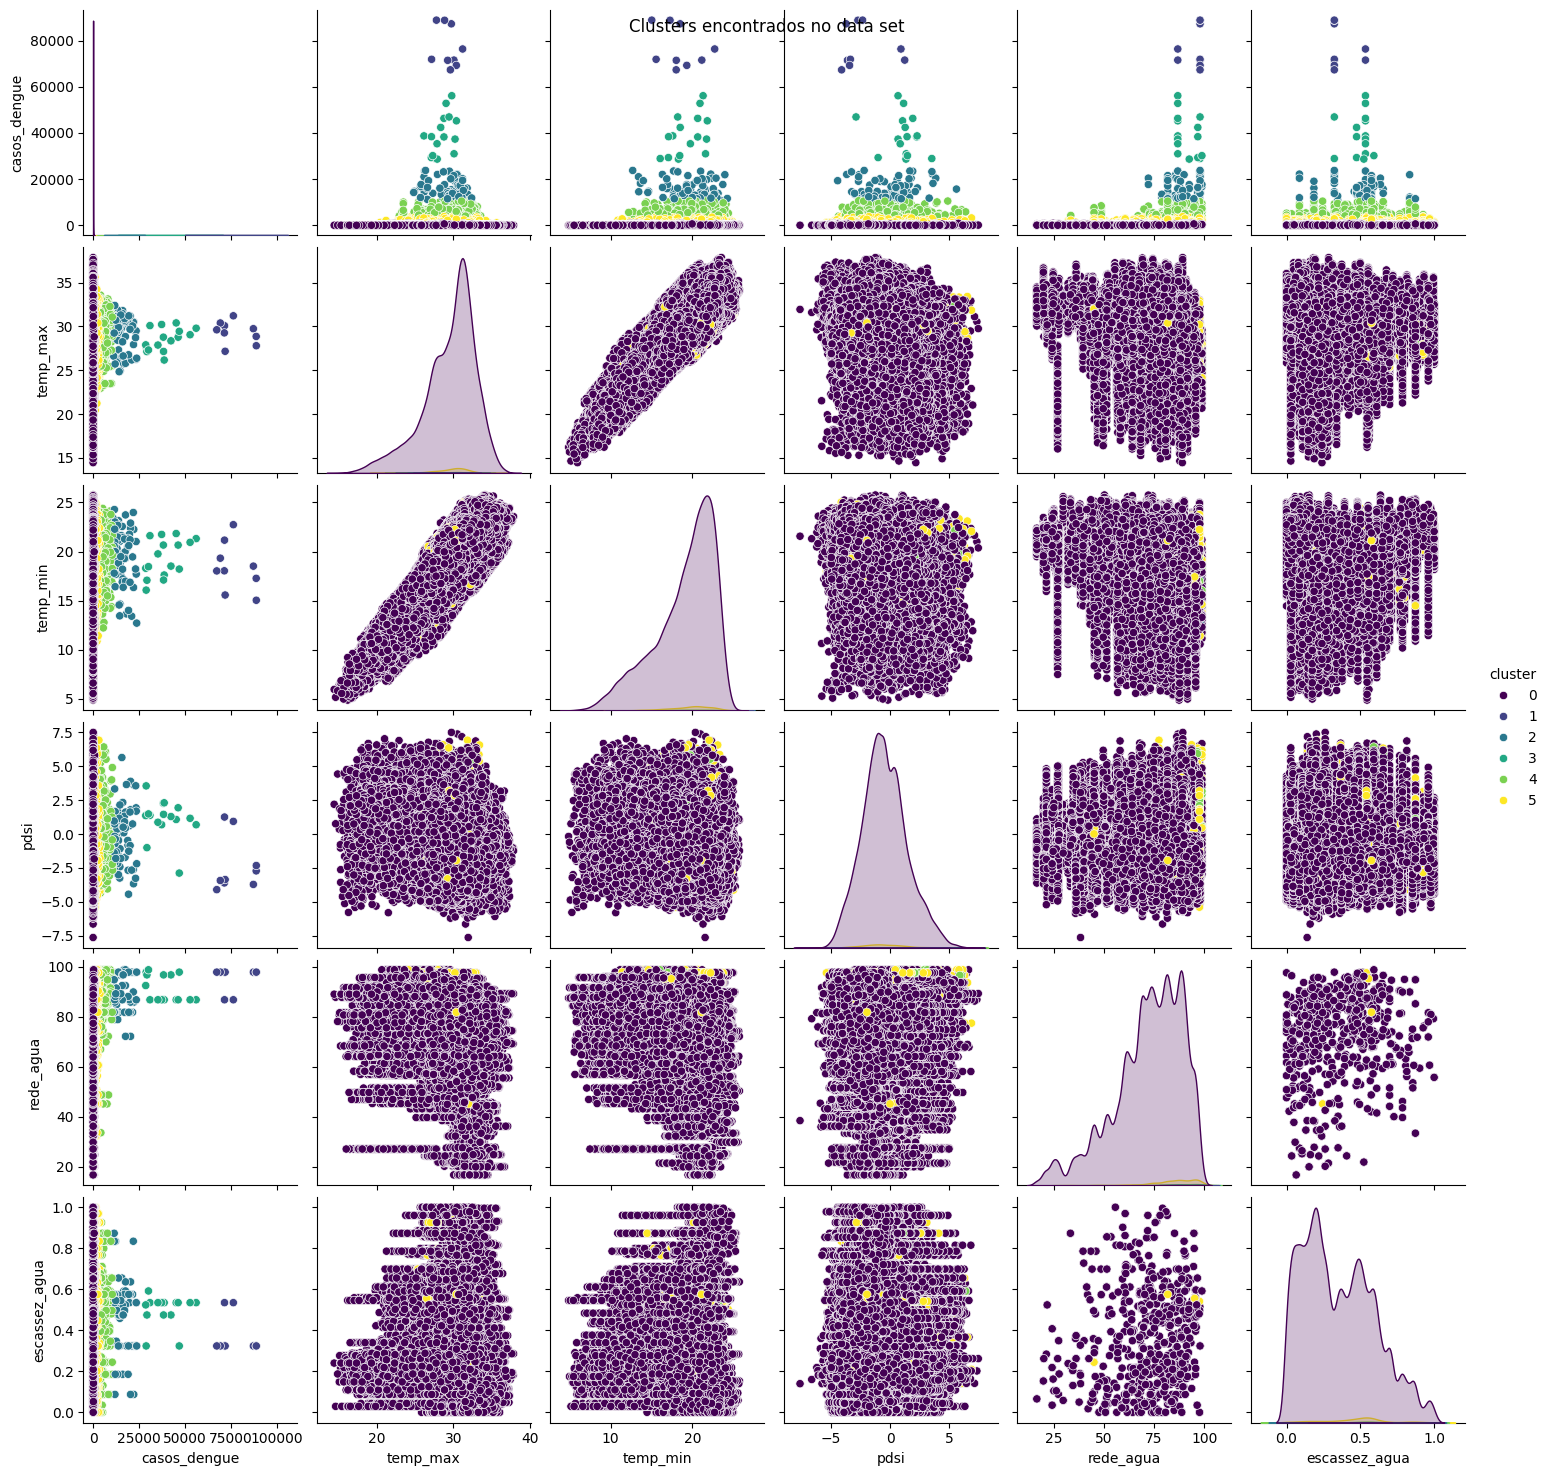

In [10]:
# Preparando os dados
df_numerico = df[['casos_dengue', 'temp_max', 'temp_min', 'pdsi', 'rede_agua', 'escassez_agua']]
dff = df_numerico

# Calculando a soma dos quadrados para 19 quantidade de clusters
soma_dos_quad = calculate_wcss(df_numerico)

# Calculando a quantidade ótima de clusters
n = optimal_number_of_clusters(soma_dos_quad)

# Rodando o kmeans com quantidade ótima de clusters
kmeans = KMeans(n_clusters=n)
kmeans.fit(df_numerico)
clusters = kmeans.fit_predict(df_numerico)

# Adicionando os clusters encontrados ao dataframe
dff['cluster'] = clusters

# Visualizando os clusters encontrados
sns.pairplot(dff, hue='cluster', palette='viridis')
plt.suptitle('Clusters encontrados no data set')
plt.show()

<h1>Definição da função que aplica o OneHotEncoder</h1>

In [11]:
def codDeAtributo(atributo, df):
    # Importando biblioteca OneHotEncoder da sklearn
    from sklearn.preprocessing import OneHotEncoder

    # Criando encoder sparse=false retorna um array denso, ao invés de uma matriz esparsa
    encoder = OneHotEncoder(sparse_output=False)

    # Ajustar e transformar os dados
    encoded_data = encoder.fit_transform(df[[atributo]])

    # Converter o resultado para um dataframe
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out([atributo]))
    #encoded_df.head()

    # Concatenando o dataframe original com o novo atributo regiao codificado
    df_machine = pd.concat([df.drop(atributo, axis=1), encoded_df], axis=1)
    return df_machine

<h2>Aplicando o OneHotEncoder para o atributo de região</h2>

In [12]:
df_codificado = codDeAtributo('regiao', df)

<h2>Aplicando OneHotEncoder para o atributo estado</h2>

In [13]:
df_codificado = codDeAtributo('estado', df_codificado)

<h2>Aplicando OneHotEncoder para atributo bioma</h2>

In [14]:
df_codificado = codDeAtributo('bioma', df_codificado)

<h2>Aplicando OneHotEncoder para atributo ecozona</h2>

In [15]:
df_codificado = codDeAtributo('ecozona', df_codificado)

<h2>Aplicando OneHotEncoder para atributo clima_principal</h2>

In [16]:
df_codificado = codDeAtributo('clima_principal', df_codificado)

<h2>Aplicando OneHotEncoder para atributo cidade</h2>

In [17]:
df_codificado = codDeAtributo('cidade', df_codificado)

In [18]:
df_codificado = df_codificado.dropna()

<h2>Importando bibliotecas</h2>
<p>Bibliotecas necessárias para regressão</p>

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

<h2>Dividindo os dados em treino e teste</h2>
<p>Utilizando a função train_test_split, vamos dividir o conjunto de dados em dois subconjuntos, um que será utilizado para treinamento e outro para teste.</p>

In [20]:
# Features ou variáveis independentes / excluindo a variável que quero prever que são os casos de dengue
X = df_codificado.drop(columns=['casos_dengue'])
# Label ou variável dependente, é o que queremos prever
y = df_codificado['casos_dengue']

# Separando os dados em treino e teste, selecionando 20% dos dados para teste, 80% para treino e definindo uma semente em 42 / 
#para garantir a reprodutibilidade do experimento
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h1>Função para gráfico de análise de regressor</h1>

In [21]:
def analise_regressor(y_test, y_reg, x):
    y_test_sub = y_test[:x]
    y_reg_sub = y_reg[:x]

    plt.figure(figsize=(14,8))
    plt.plot(y_test_sub.values, label='Real', marker='o', linestyle='-', markersize=5)
    plt.plot(y_reg_sub, label='Previsto', marker='x', linestyle='-', markersize=5)
    plt.title('Comparação entre valores reais e previstos')
    plt.xlabel('Índice')
    plt.ylabel('Valores')
    plt.legend()
    plt.grid(True)
    plt.show()

<h2>Treinando o modelo de regressão linear</h2>

In [22]:
reg_model = LinearRegression()
reg_model.fit(x_train, y_train)
y_pred_reg = reg_model.predict(x_test)

<h2>Importando biblioteca de métricas para análise do modelo</h2>

In [23]:
from sklearn.metrics import mean_squared_error,  mean_absolute_error, mean_absolute_percentage_error

<h2>Avaliando modelo de regressão linear</h2>

In [24]:
mse = mean_squared_error(y_test, y_pred_reg)
print("Erro quadrático médio (MSE) para regressão:", mse)

mae = mean_absolute_error(y_test, y_pred_reg)
print("Erro médio absoluto (MAE) para regressão:", mae)
3
mape = mean_absolute_percentage_error(y_test, y_pred_reg)
print("Erro médio percentual absoluto (MAPE) para regressão:", mape)

Erro quadrático médio (MSE) para regressão: 934298.9279823919
Erro médio absoluto (MAE) para regressão: 165.2986470436055
Erro médio percentual absoluto (MAPE) para regressão: 1.1252784882467152e+17


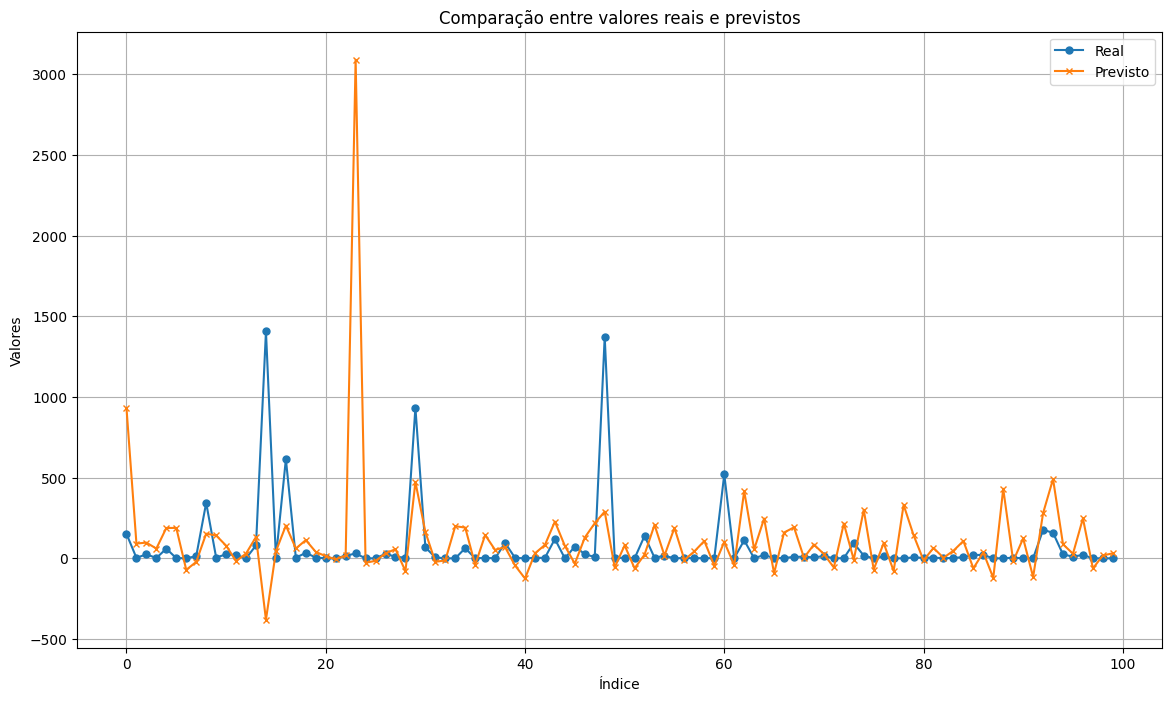

In [25]:
analise_regressor(y_test, y_pred_reg, 100)

<h1>Avaliando o KNN Regressor</h1>

In [26]:
from sklearn.neighbors import KNeighborsRegressor


reg_model_knn = KNeighborsRegressor(n_neighbors=5)
reg_model_knn.fit(x_train, y_train)
y_pred_reg_knn = reg_model_knn.predict(x_test)

In [27]:
mse = mean_squared_error(y_test, y_pred_reg_knn)
print("Erro quadrático médio (MSE) para regressão:", mse)

mae = mean_absolute_error(y_test, y_pred_reg_knn)
print("Erro médio absoluto (MAE) para regressão:", mae)
3
mape = mean_absolute_percentage_error(y_test, y_pred_reg_knn)
print("Erro médio percentual absoluto (MAPE) para regressão:", mape)

Erro quadrático médio (MSE) para regressão: 464101.88910688256
Erro médio absoluto (MAE) para regressão: 80.35052671024691
Erro médio percentual absoluto (MAPE) para regressão: 4004353941068662.0


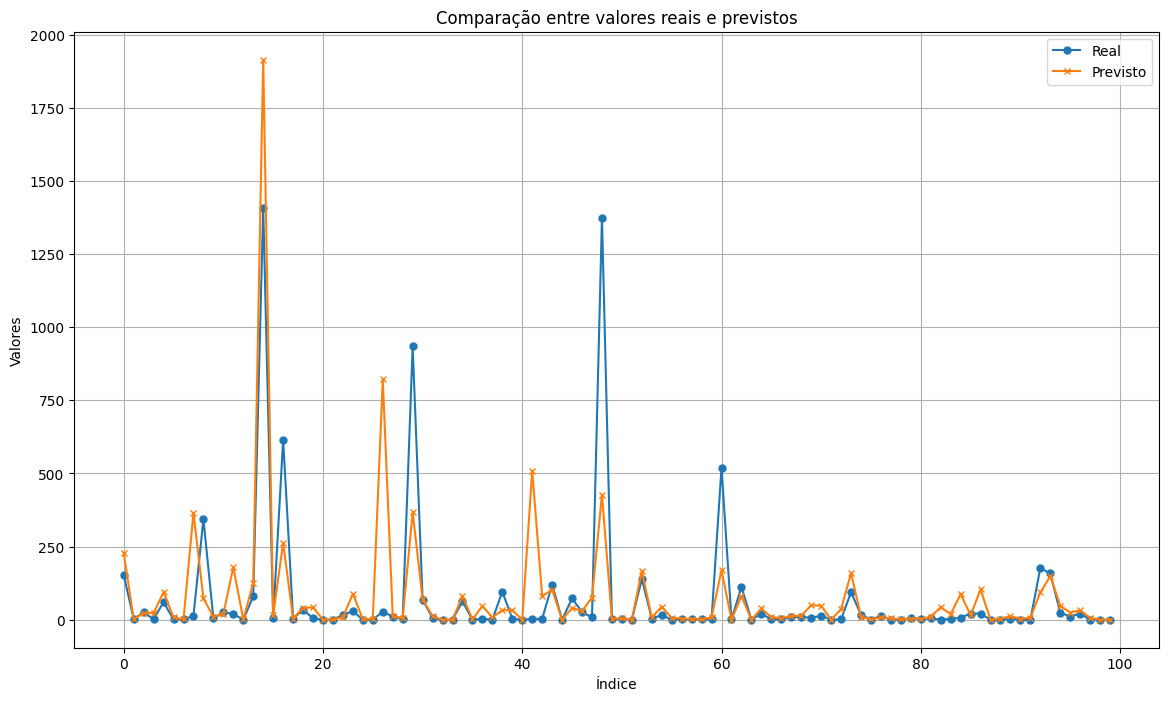

In [28]:
analise_regressor(y_test, y_pred_reg_knn, 100)

<h2>Avaliando o  DecisionTree</h2>

In [29]:
from sklearn.tree import DecisionTreeRegressor

reg_model_dt = DecisionTreeRegressor()
reg_model_dt.fit(x_train, y_train)
y_pred_reg_dt = reg_model_dt.predict(x_test)

In [30]:
mse = mean_squared_error(y_test, y_pred_reg_dt)
print("Erro quadrático médio (MSE) para regressão:", mse)

mae = mean_absolute_error(y_test, y_pred_reg_dt)
print("Erro médio absoluto (MAE) para regressão:", mae)
3
mape = mean_absolute_percentage_error(y_test, y_pred_reg_dt)
print("Erro médio percentual absoluto (MAPE) para regressão:", mape)

Erro quadrático médio (MSE) para regressão: 1155533.7555481533
Erro médio absoluto (MAE) para regressão: 99.6699421243286
Erro médio percentual absoluto (MAPE) para regressão: 7316357024653984.0


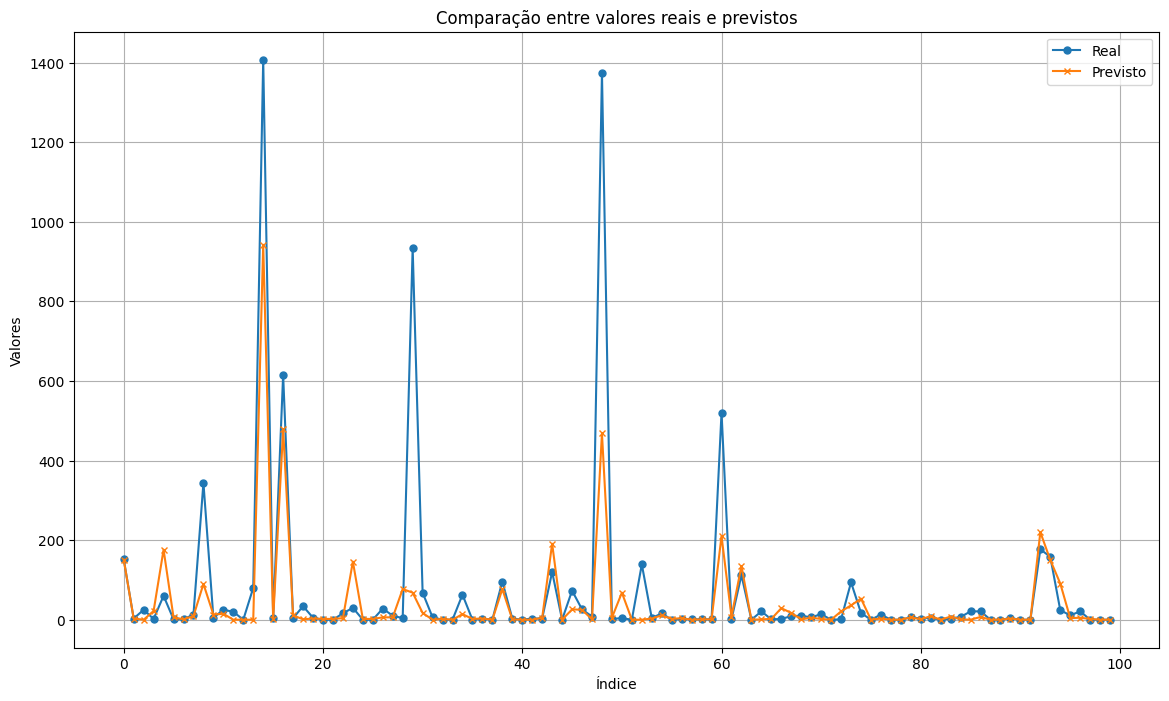

In [31]:
analise_regressor(y_test, y_pred_reg_dt, 100)

<h2>Random Forest Regressor</h2>

In [32]:
# Import de biblioteca necessária
from sklearn.ensemble import RandomForestRegressor

reg_model_rf = RandomForestRegressor(n_estimators=100)#n_estimators=10
reg_model_rf.fit(x_train, y_train)
y_pred_reg_rf = reg_model_rf.predict(x_test)

In [33]:
mse = mean_squared_error(y_test, y_pred_reg_rf)
print("Erro quadrático médio (MSE) para regressão:", mse)

mae = mean_absolute_error(y_test, y_pred_reg_rf)
print("Erro médio absoluto (MAE) para regressão:", mae)
3
mape = mean_absolute_percentage_error(y_test, y_pred_reg_rf)
print("Erro médio percentual absoluto (MAPE) para regressão:", mape)

Erro quadrático médio (MSE) para regressão: 849652.9950926428
Erro médio absoluto (MAE) para regressão: 84.98835907898571
Erro médio percentual absoluto (MAPE) para regressão: 1.1029534319955856e+16
